In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Read dataset with proper encoding
df = pd.read_csv("dataset.csv", encoding='latin1')


In [13]:
df.head()

,week,category,weekly_rank,show_title,season_title,weekly_hours_viewed,runtime,weekly_views,cumulative_weeks_in_top_10,is_staggered_launch,episode_launch_details
0,2024-01-07,Films (English),1,The Equalizer 3,NaN,26800000,1.8167,14800000.0,1,False,NaN
1,2024-01-07,Films (English),2,Rebel Moon ? Part One: A Child of Fire,NaN,25100000,2.2667,11100000.0,3,False,NaN
2,2024-01-07,Films (English),3,Leave the World Behind,NaN,18700000,2.3667,7900000.0,5,False,NaN
3,2024-01-07,Films (English),4,Exodus: Gods and Kings,NaN,18600000,2.5000,7400000.0,1,False,NaN
4,2024-01-07,Films (English),5,Aquaman,NaN,16800000,2.3833,7000000.0,1,False,NaN


In [6]:
# Count the occurrences of unique values in the second column of the DataFrame
value_counts = df.iloc[:, 1].value_counts()

for value, count in value_counts.items():
    print(f"Number of {value} are: {count}")

    

Number of Films (English) are :1320
Number of Films (Non-English) are :1320
Number of TV (Non-English) are :1320
Number of TV (English) are :1320


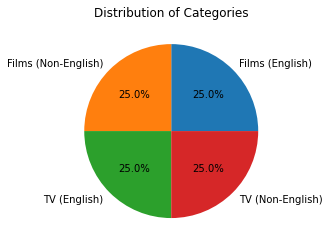

In [7]:
catgory = df.iloc[:, 1].unique()
catgorycount = df.iloc[:, 1].value_counts()
labels = catgory
sizes = [catgorycount[category] for category in catgory]
# Create a pie chart to visualize the distribution of categories
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Categories')
plt.show()

In [8]:
# Extract the top viewed shows based on weekly hours viewed
top_viewed = df[['show_title', 'weekly_hours_viewed']].sort_values(by='weekly_hours_viewed', ascending=False).head(10)
print('Top viewed shows are:')
print(top_viewed)

# Group the data by 'show_title' and sum the weekly hours viewed for each show
combined_hours = df.groupby('show_title')['weekly_hours_viewed'].sum().reset_index()

# Extract the top viewed shows after combining weekly hours viewed
top_viewed = combined_hours.sort_values(by='weekly_hours_viewed', ascending=False).head(20)
print('\nTop viewed shows after combining are:\n')
print(top_viewed)


Top viewed shows are: 
           show_title  weekly_hours_viewed
4750       Squid Game            571760000
4790       Squid Game            448730000
4710       Squid Game            412940000
2300        Wednesday            411290000
2340        Wednesday            341230000
3340  Stranger Things            335010000
3180  Stranger Things            301280000
2660           DAHMER            299840000
3380  Stranger Things            286790000
2260        Wednesday            269670000


Top viewed shows aftre combining are :


                   show_title  weekly_hours_viewed
1227          Stranger Things           2967980000
1220               Squid Game           2315500000
1658                Wednesday           1806850000
848                  Manifest           1320520000
1706                      You           1245390000
895               Money Heist           1185400000
1519              The Witcher           1117900000
215                Bridgerton           1040310000
99

In [ ]:
# Plot the monthly hours viewed by category
df['month'] = pd.to_datetime(df['week']).dt.strftime('%m-%Y')
monthly_category_viewed_hours = df.groupby(['month', 'category'])['weekly_hours_viewed'].sum().reset_index()
plt.figure(figsize=(12, 6))
for category, group_data in monthly_category_viewed_hours.groupby('category'):
    plt.plot(group_data['month'], group_data['weekly_hours_viewed'], marker='o', label=category)
plt.title('Monthly Hours Viewed by Category')
plt.xlabel('Month')
plt.ylabel('Total Monthly Hours Viewed')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

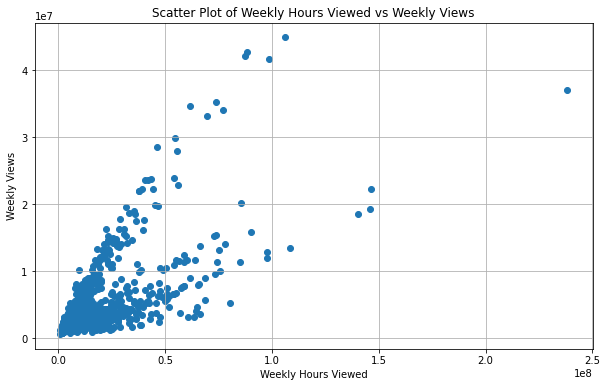

In [14]:
# Assuming 'weekly_hours_viewed' as x-axis and 'weekly_views' as y-axis
plt.figure(figsize=(10, 6))
plt.scatter(df['weekly_hours_viewed'], df['weekly_views'])
plt.title('Scatter Plot of Weekly Hours Viewed vs Weekly Views')
plt.xlabel('Weekly Hours Viewed')
plt.ylabel('Weekly Views')
plt.grid(True)
plt.show()

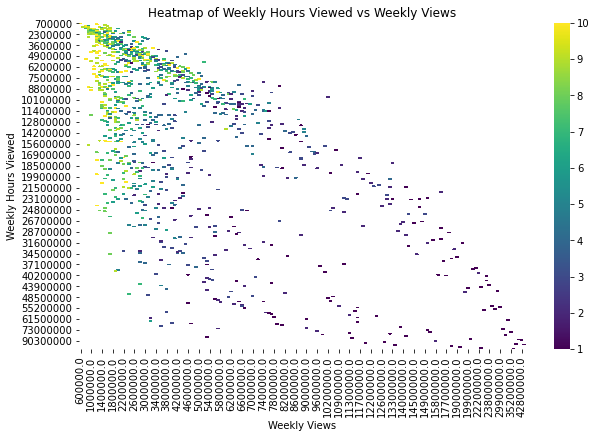

In [15]:
# Assuming 'weekly_hours_viewed' as x-axis and 'weekly_views' as y-axis
plt.figure(figsize=(10, 6))
heatmap_data = df.pivot_table(index='weekly_hours_viewed', columns='weekly_views', values='weekly_rank')
sns.heatmap(heatmap_data, cmap='viridis')
plt.title('Heatmap of Weekly Hours Viewed vs Weekly Views')
plt.xlabel('Weekly Views')
plt.ylabel('Weekly Hours Viewed')
plt.show()